In [1]:
import pandas as pd

In [2]:
# 곡 정보 파일 불러오기
df = pd.read_csv('../SongTidy/FinalTidy/tidydata/song_tidy03.csv')

In [3]:
df2 = pd.read_csv('../Data/Data20180921/artist_info_combined_ver04.csv', encoding='euc-kr')

In [4]:
# 곡 정보와 가수 정보를 머지해준다.
song = pd.merge(df, df2, on='artist')
song.shape

(9566, 20)

In [5]:
import numpy as np
import re
from soynlp.tokenizer import RegexTokenizer
import gensim
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim import corpora, models
from gensim.models import LdaMulticore
from gensim.models import Word2Vec
from gensim.corpora import Dictionary, MmCorpus


tokenizer = RegexTokenizer()
tokenizer

In [6]:
# 가사 분석에 용이하도록 <br>을 공백으로 바꿔준다.
song['lyrics'] = song['lyrics'].str.replace(r'<br>', ' ')

In [7]:
# 0세대~3세대로 구분
song0 = song[song["release_date"].str.contains('1992|1993|1994|1995', na=False)]
song1 = song[song["release_date"].str.contains('1996|1997|1998|1999|2000|2001|2002|2003', na=False)]
song2 = song[song["release_date"].str.contains('2004|2005|2006|2007|2008|2009|2010|2011', na=False)]
song3 = song[song["release_date"].str.contains('2012|2013|2014|2015|2016|2017|2018', na=False)]

In [8]:
!pip install soynlp
!pip show soynlp

Name: soynlp
Version: 0.0.46
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /Users/yunkim/anaconda3/lib/python3.6/site-packages
Requires: psutil, numpy
Required-by: 


In [9]:
!pip install gensim
!pip show gensim

Name: gensim
Version: 3.5.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: /Users/yunkim/anaconda3/lib/python3.6/site-packages
Requires: smart-open, numpy, six, scipy
Required-by: 


In [10]:
female0 = song0[song0['gender'] == '여']
female0.shape

(10, 20)

In [11]:
female1 = song1[song1['gender'] == '여']
female1.shape

(617, 20)

In [12]:
female2 = song2[song2['gender'] == '여']
female2.shape

(737, 20)

In [13]:
female3 = song3[song3['gender'] == '여']
female3.shape

(1974, 20)

In [14]:
male0 = song0[song0['gender'] == '남']
male0.shape

(171, 20)

In [15]:
male1 = song1[song1['gender'] == '남']
male1.shape

(1360, 20)

In [16]:
male2 = song2[song2['gender'] == '남']
male2.shape

(1387, 20)

In [17]:
male3 = song3[song3['gender'] == '남']
male3.shape

(2951, 20)

In [18]:
# 여자아이돌 곡 중 제목에 '오빠' (혹은 오빤)가 등장하는 곡 수는?
female_o = female3[female3['title'].str.contains(r"(오빠|오빤)")]
female_o.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


(4, 20)

In [19]:
# 남자아이돌 곡 중 제목에 '오빠' (혹은 오빤)가 등장하는 곡 수는?
male_o = male3[male3['title'].str.contains(r"(오빠|오빤)")]
male_o.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


(1, 20)

In [20]:
female_o = female3[female3['lyrics'].str.contains(r"(오빠|오빤)")]
female_o.sort_values(by=['release_date'])

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger,artist_m,gender,idol_id,agency_old,agency_new,debut_y,debut_t,fan
4390,나쁜남자,써니힐,The Grasshoppers,2012.01.13,Dance,수록곡,919,미성 작사 코타 작사 전자맨 작곡 미성 작곡 코타 ...,내가 예전에는 말이야 오빤 말이 많아 오빤 말이 많아 내가 다 해봐서 아는데 오빤 ...,"미성, 코타","전자맨, 미성, 코타",전자맨,"주비, 승아, 미성, 코타",여,229494,NaN,로엔,2007.0,통화 연결음,14283
4505,leadme,씨스타,ALONE,2012.04.12,Ballad,수록곡,"10,254",이단옆차기 작사 이단옆차기 작곡 이단옆차기 편곡,s.i.s.t.t.a.r my love is going to far I know y...,이단옆차기,이단옆차기,이단옆차기,"효린, 소유 (SOYOU), 다솜 (씨스타), 보라 (씨스타)",여,473181,NaN,스타쉽,2010.0,Push Push (푸시 푸시),75079
234,oh!mygod,걸스데이,Everyday II,2012.04.18,Dance,타이틀 곡,"8,075",강지원 작사 김기범 작사 강지원 작곡 김기범 작곡 강지...,OH OH OH MA MA MA 어우워우 어 어 우워우 OH OH OH MA MA ...,"강지원, 김기범","강지원, 김기범",강지원,"소진 (걸스데이), 민아 (걸스데이), 유라 (걸스데이), 혜리 (걸스데이)",여,482762,NaN,드림티,2010.0,갸우뚱,59218
4508,lovingu(러빙유),씨스타,Summer Special `Loving U`,2012.06.28,Dance,타이틀 곡,"77,931",이단옆차기 작사 이단옆차기 작곡 이단옆차기 편곡,Hey 참 이상해 정말 strange 이런 적 없었는데 널 볼때마다 나 두근두근 떨...,이단옆차기,이단옆차기,이단옆차기,"효린, 소유 (SOYOU), 다솜 (씨스타), 보라 (씨스타)",여,473181,NaN,스타쉽,2010.0,Push Push (푸시 푸시),75079
4129,"1,2,3",시크릿,POISON,2012.09.13,Dance,수록곡,"1,059",2Story 작사 Javier Solis 작사 정하나 작사 2...,1 2 3 do you wanna love with me 늘 똑같은 everyday...,"2Story, Javier Solis, 정하나","2Story, Javier Solis",NaN,"송지은, 전효성, 정하나, 한선화",여,435121,NaN,TS,2009.0,I Want You Back,10626
3529,igotaboy,소녀시대,I Got A Boy,2013.01.01,Dance,타이틀 곡,"52,032",유영진 작사 유영진 작곡 Will Simms 작곡 Anne J...,Ayo GG Yeah Yeah 시작해 볼까 어머 얘 좀 봐라 얘 무슨 일이 있었길래...,유영진,"유영진, Will Simms, Anne Judith Wik, Sarah Lundback","유영진, Will Simms, Anne Judith Wik, Sarah Lundback","태연 (TAEYEON), 써니 (SUNNY), 유리 (YURI), 수영 (SOOYO...",여,228069,NaN,SM,2007.0,다시 만난 세계 (Into The New World),105431
248,oh!mygod!,걸스데이,기대,2013.03.14,Dance,수록곡,"2,405",강지원 작사 김기범 작사 강지원 작곡 김기범 작곡 강지...,OH OH OH MA MA MA 어우워우 어 어 우워우 OH OH OH MA MA ...,"강지원, 김기범","강지원, 김기범",강지원,"소진 (걸스데이), 민아 (걸스데이), 유라 (걸스데이), 혜리 (걸스데이)",여,482762,NaN,드림티,2010.0,갸우뚱,59218
4013,sunnyday,스카프,러브 바이러스 (Luv Virus),2013.05.31,Ballad,수록곡,54,서정모 작사 서정모 작곡 서정모 편곡,Uh I will love you 햇살 좋은 날 그대와 떠나는 여행 밤새 잠을 못 ...,서정모,서정모,서정모,"페린, 타샤, 제니, 주아, 하나",여,687891,NaN,알파,2012.0,NaN,108
4404,만인의연인(feat.하림),써니힐,Young Folk,2013.06.19,Dance,타이틀 곡,"16,562",김이나 작사 KZ 작곡 KZ 편곡,Oh 내가 그 유명한 만인의 연인 다 내게 와서 털어 놓곤 해 고민거리들 근데 이게...,김이나,KZ,KZ,"주비, 승아, 미성, 코타",여,229494,NaN,로엔,2007.0,통화 연결음,14283
637,어쩜(narr.안재현),달샤벳,Be Ambitious,2013.06.20,Ballad,수록곡,"1,318",우희 (달샤벳) 작사 우희 (달샤벳) 작곡 BULL$EYE 편곡,오빠 응 오빠 내가 어디가 좋아 음 힘 어깨 뭐야 아니야 예뻐 예쁘대 너가 내 눈 ...,우희 (달샤벳),우희 (달샤벳),BULL$EYE,"수빈, 세리 (달샤벳), 아영 (달샤벳), 우희 (달샤벳)",여,514619,NaN,해피페이스,2011.0,Supa Dupa Diva,6022


In [21]:
male_o = male3[male3['lyrics'].str.contains(r"(오빠|오빤)")]
male_o.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(35, 20)

In [22]:
female_o = female3[female3['lyrics'].str.contains(r"(누나|누난)")]
female_o.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(8, 20)

In [23]:
male_o = male3[male3['lyrics'].str.contains(r"(누나|누난)")]
male_o.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(15, 20)

In [24]:
female_o2 = female2[female2['lyrics'].str.contains(r"(오빠|오빤)")]
female_o2.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(6, 20)

In [25]:
male_o2 = male2[male2['lyrics'].str.contains(r"(오빠|오빤)")]
male_o2.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(10, 20)

In [26]:
female_o2 = female2[female2['lyrics'].str.contains(r"(누나|누난)")]
female_o2.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(2, 20)

In [27]:
male_o2 = male2[male2['lyrics'].str.contains(r"(누나|누난)")]
male_o2.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(9, 20)

In [28]:
female_o1 = female1[female1['lyrics'].str.contains(r"(오빠|오빤)")]
female_o1.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(5, 20)

In [29]:
male_o1 = male1[male1['lyrics'].str.contains(r"(누나|누난)")]
male_o1.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(6, 20)

In [30]:
# 여자아이돌 곡 중 제목에 '오빠' (혹은 오빤)가 등장하는 곡 수는?
female_o0 = female0[female0['title'].str.contains(r"(오빠|오빤)")]
female_o0.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


(0, 20)

In [31]:
male_o0 = male0[male0['lyrics'].str.contains(r"(누나|누난)")]
male_o0.shape

/Users/yunkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(0, 20)

In [32]:
def percent(num1, num2):
    num1 = float(num1)
    num2 = float(num2)
    percentage = '{0:.3f}'.format((num1 / num2 * 10))
    return percentage

In [33]:
# 1세대 여자아이돌 곡 중 가사에 '오빠' (혹은 오빤)가 등장하는 곡 비율
percent(5, 614)

'0.081'

In [34]:
# 2세대 여자아이돌 곡 중 가사에 '오빠' (혹은 오빤)가 등장하는 곡 비율
percent(6, 737)

'0.081'

In [35]:
# 3세대 여자아이돌 곡 중 가사에 '오빠' (혹은 오빤)가 등장하는 곡 비율
percent(38, 1960)

'0.194'

In [36]:
# 1세대 남자아이돌 곡 중 가사에 '누나' (혹은 누난)가 등장하는 곡 비율
percent(5, 1345)

'0.037'

In [37]:
# 2세대 남자아이돌 곡 중 가사에 '누나' (혹은 누난)가 등장하는 곡 비율
percent(9, 1387)

'0.065'

In [38]:
# 3세대 남자아이돌 곡 중 가사에 '누나' (혹은 누난)가 등장하는 곡 비율
percent(14, 2815)

'0.050'

In [39]:
import plotly

In [40]:
df = pd.DataFrame({
    'female_n': [0.081, 0.081, 0.194],
    'male_n': [0.037, 0.065, 0.050]
    }, index=[1, 2, 3])
lines = df.plot.line()

In [41]:
year = [1, 2, 3]
female_o = [0.081, 0.081, 0.194]
male_n = [0.037, 0.065, 0.050]
plt.plot(year, female_o, color='g')
plt.plot(year, male_n, color='orange')
plt.xlabel('Countries')
plt.ylabel('Population in million')
plt.title('Pakistan India Population till 2010')
plt.show()

NameError: name 'plt' is not defined

In [43]:
category_count3 = pd.Series([0.081, 0.037, 0.081, 0.065, 0.194, 0.050],
                    index=['여자아이돌 가사 속 오빠_1', '남자아이돌 가사 속 누나_1', 
                           '여자아이돌 가사 속 오빠_2', '남자아이돌 가사 속 누나_2',
                            '여자아이돌 가사 속 오빠_3', '남자아이돌 가사 속 누나_3'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

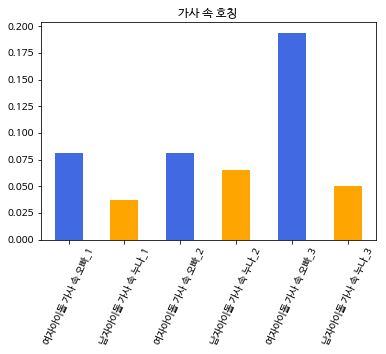

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count3.plot(kind='bar', color=['royalblue', 'orange', 'royalblue', 'orange', 'royalblue', 'orange'], title='가사 속 호칭')  #X11 color names 로 검색
# plt.bar(y_pos, height, color=['blue', 'orange', 'blue', 'orange',])
plt.xticks(rotation=65)

In [51]:
female = song[song['gender'] == '여']
female.shape

(3338, 20)

In [50]:
male = song[song['gender'] == '남']
male.shape

(5869, 20)

In [80]:
male_yo = male[male['lyrics'].str.contains(r".{1,4}요$")]
male_yo.shape

(208, 20)

In [79]:
female_yo = female[female['lyrics'].str.contains(r".{1,4}요$")]
female_yo.shape

(168, 20)

In [153]:
time_series = pd.DataFrame({
    "generation" : ["1", "1", "2", "2", "3", "3"],
    "title" : ["oppa", "nuna", "oppa", "nuna", "oppa", "nuna"],
    "value" : [0.081, 0.037, 0.081, 0.065, 0.194, 0.050],
})
time_series

,generation,title,value
0,1,oppa,0.081
1,1,nuna,0.037
2,2,oppa,0.081
3,2,nuna,0.065
4,3,oppa,0.194
5,3,nuna,0.050


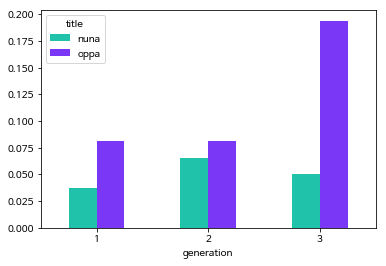

In [159]:
color = '#20C2AA', '#7A37F5'
time_series.pivot(index='generation', columns='title', values='value').plot.bar(color = color, rot=0)

In [125]:
#7A37F5
#20C2AA

NameError: name 'key' is not defined

In [160]:
time_series = pd.DataFrame({
    "generation" : ["1", "1", "2", "2", "3", "3"],
    "title" : ["oppa", "nuna", "oppa", "nuna", "oppa", "nuna"],
    "value" : [0.081, 0.037, 0.081, 0.065, 0.194, 0.050],
})
time_series

,generation,title,value
0,1,oppa,0.081
1,1,nuna,0.037
2,2,oppa,0.081
3,2,nuna,0.065
4,3,oppa,0.194
5,3,nuna,0.050
